In [1]:
import pandas as pd
import seaborn as sns
import chardet as cd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 题目1

## 数据预处理

In [2]:
df1 = pd.read_csv('HW3_1_data.csv')
df1 = df1.dropna()

# 聚类算法1 DBSCAN

## 遍历寻找最佳参数(DBSCAN)评价标准为ch分数越大越好

### 手动测试时发现当eps小于0.3时和大于3时效果不佳,当smples大于20时效果也不佳,被判定为噪声的点过多,故选择在这个范围内遍历寻找

In [3]:
X = df1.iloc[:,[0,1]].values
scores =0
saveeps= 0
savemin_samples=0
for i in np.arange(0.1, 3, 0.01):
    for j in np.arange(5,20):
        try:
            dbscan = DBSCAN(eps = i,min_samples = j)
            y_pred = dbscan.fit_predict(X)
            if(scores<metrics.calinski_harabasz_score(X, y_pred)):
                scores = metrics.calinski_harabasz_score(X, y_pred)
                saveeps = i
                savemin_samples = j
        except:
            continue

### 利用寻找到的最佳参数进行训练

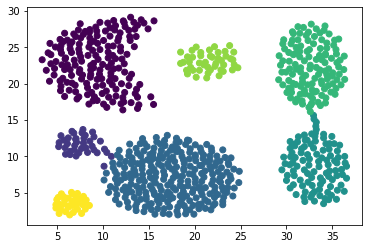

参数选择为 eps =  2.019999999999999 min_samples =  14
Ch分数为 1222.7547493026195


In [4]:
dbscan = DBSCAN(eps = saveeps,min_samples = savemin_samples)
y_pred = dbscan.fit_predict(df1)
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], c=y_pred)
plt.show()
print('参数选择为','eps = ',saveeps,"min_samples = ",savemin_samples)
print('Ch分数为',metrics.calinski_harabasz_score(X, y_pred))

# 聚类算法2 Kmeans

## 遍历寻找最佳参数(kmeans)评价标准为通过轮廓系数评价 迭代次数选择30000 让其尽量收敛

In [5]:
test_scores = [None]*28
X = df1.iloc[:,[0,1]].values
scores = 0
clusternum =0

#将数据标准化
X = StandardScaler().fit_transform(X)


for i in range(2,30):
    kmeans= KMeans(n_clusters=i, random_state=100,max_iter=30000)
    y_pred = kmeans.fit_predict(X)
    test_scores[i-2] = metrics.silhouette_score(X, y_pred)
    if(scores<metrics.silhouette_score(X, y_pred)):
        scores = metrics.silhouette_score(X, y_pred)
        clusternum = i 

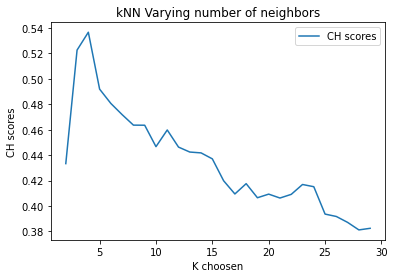

In [6]:
index  = range(2,30)
plt.title('kNN Varying number of neighbors')
plt.plot(index, test_scores, label='CH scores')
plt.legend()
plt.xlabel('K choosen')
plt.ylabel('CH scores')
plt.show()

### 聚类结果

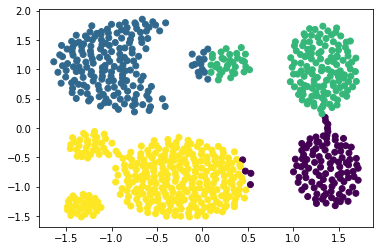

聚类参数选择为 4
轮廓系数为 0.5365827183828406


In [7]:

kmeans= KMeans(n_clusters=clusternum, random_state=100,max_iter=300000,n_init = 100,init = 'random')
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
print('聚类参数选择为',clusternum)
print('轮廓系数为',metrics.silhouette_score(X, y_pred, metric='euclidean', sample_size=None, random_state=None))

# 问题2

## 使用kmeans算法进行聚类分析

### 数据预处理

In [8]:
df2 = pd.read_csv('HW3_2_data.csv')
df2 = df2.dropna()

### 去除第一列无用数据并将训练数据标准化

In [9]:
X2 = df2.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
X2 = X2.dropna()
X2 = X2.values
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X2)

## 使用主成分分析(PCA)将高维数据降维

In [10]:
pca = PCA(n_components =10)
newX = pca.fit_transform(X2)
print(pca.explained_variance_ratio_.sum())

0.9197695792289546


## 可以发现当n_components=8时已包含92%的信息

### 通过遍历寻找,选取CH系数最大的k作为最终结果 迭代次数设置为300000让模型尽量收敛

In [11]:
test_scores2 = [None]*17
clusternum = 0
scores = 0
for i in range(2,18):
    
    kmeans= KMeans(n_clusters=i,max_iter=300000)
    y_pred = kmeans.fit_predict(newX)
    test_scores2[i-2] = metrics.silhouette_score(newX, y_pred)
    if(scores<metrics.silhouette_score(newX, y_pred)):
        scores = metrics.silhouette_score(newX, y_pred)
        clusternum = i 

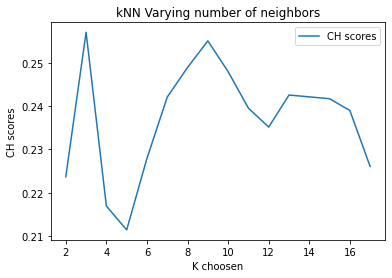

In [12]:
index  = range(2,19)
plt.title('kNN Varying number of neighbors')
plt.plot(index, test_scores2, label='CH scores')
plt.legend()
plt.xlabel('K choosen')
plt.ylabel('CH scores')
plt.show()

### 最终聚类结果

In [13]:
kmeans= KMeans(n_clusters=3,max_iter=300000)
y_pred = kmeans.fit_predict(newX)
print('最终分成的类数为',clusternum)
print('CH系数为',metrics.calinski_harabasz_score(newX, y_pred))
print('轮廓系数为',metrics.silhouette_score(newX, y_pred, metric='euclidean', sample_size=None, random_state=None))

最终分成的类数为 3
CH系数为 1729.199607768435
轮廓系数为 0.25771326995411525
